In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from wordcloud import WordCloud,STOPWORDS

data=pd.read_excel('data/국민여행조사.xlsx')
loc=pd.read_csv('data/지역코드북.csv',encoding = 'cp949')

In [21]:
# 데이터 재가공

#지역코드데이터 가공
loc.dropna(inplace=True)
loc['지역명']=loc['시/도명']+" "+loc['시/군/구 코드']
loc[['시/도코드','지역코드']]=loc[['시/도코드','지역코드']].astype('str')

#여행데이터 가공
tra_df=pd.DataFrame(columns=['여행유형','시작날짜_년','시작날짜_월','시작날짜_일','여행일수(박)','여행총경비','여행인원','1인지출비용','여행지역','성별','연령'])
for i in range(1,7):
    case=data[['D_TRA'+str(i)+'_CASE','D_TRA'+str(i)+'_SYEAR','D_TRA'+str(i)+'_SMONTH','D_TRA'+str(i)+'_SDAY','D_TRA'+str(i)+'_S_Day','D_TRA'+str(i)+'_COST','D_TRA'+str(i)+'_NUM','D_TRA'+str(i)+'_ONE_COST','D_TRA'+str(i)+'_1_SPOT','BSEX','BAGE']]
    case.columns=['여행유형','시작날짜_년','시작날짜_월','시작날짜_일','여행일수(박)','여행총경비','여행인원','1인지출비용','여행지역','성별','연령']
    tra_df=pd.concat([tra_df,case],ignore_index=True)
tra_df.dropna(subset=['여행지역'],inplace=True,ignore_index=True)

tra_df=tra_df.convert_dtypes()
tra_df[['여행지역','여행유형','성별','연령']]=tra_df[['여행지역','여행유형','성별','연령']].astype('str')
tra_df['여행유형']=tra_df['여행유형'].astype('category')
tra_df['여행유형']=tra_df['여행유형'].cat.rename_categories({'1':'관광여행','2':'방문여행','3':'단순방문','4':'출장여행','5':'단순출장'})
tra_df['성별']=tra_df['성별'].astype('category')
tra_df['성별']=tra_df['성별'].cat.rename_categories({'1':'남성','2':'여성'})
tra_df['연령']=tra_df['연령'].astype('category')
tra_df['연령']=tra_df['연령'].cat.rename_categories({'1':'15-19세','2':'20대','3':'30대','4':'40대','5':'50대','6':'60대','7':'70대 이상'})
tra_df=pd.merge(tra_df, loc[['지역코드','지역명']], how='inner', left_on='여행지역', right_on='지역코드')
tra_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_9016\3164089348.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tra_df=pd.concat([tra_df,case],ignore_index=True)


,여행유형,시작날짜_년,시작날짜_월,시작날짜_일,여행일수(박),여행총경비,여행인원,1인지출비용,여행지역,성별,연령,지역코드,지역명
0,관광여행,2022,1,15,2,800000,5,160000,32070,여성,15-19세,32070,강원도 삼척시
1,관광여행,2022,1,9,5,1000000,1,1000000,39020,여성,30대,39020,제주특별자치도 서귀포시
2,관광여행,2022,1,30,1,399999,3,133333,32030,남성,30대,32030,강원도 강릉시
3,관광여행,2022,1,29,2,600003,3,200001,32030,남성,50대,32030,강원도 강릉시
4,관광여행,2022,1,9,0,100000,2,50000,32010,남성,40대,32010,강원도 춘천시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26558,관광여행,2022,3,27,0,100000,2,50000,34340,여성,50대,34340,충청남도 서천군
26559,관광여행,2022,1,30,0,39999,3,13333,37070,남성,60대,37070,경상북도 영천시
26560,단순출장,2022,2,27,0,20000,1,20000,22020,남성,40대,22020,대구광역시 동구
26561,단순출장,2022,3,31,0,20000,1,20000,32020,남성,40대,32020,강원도 원주시


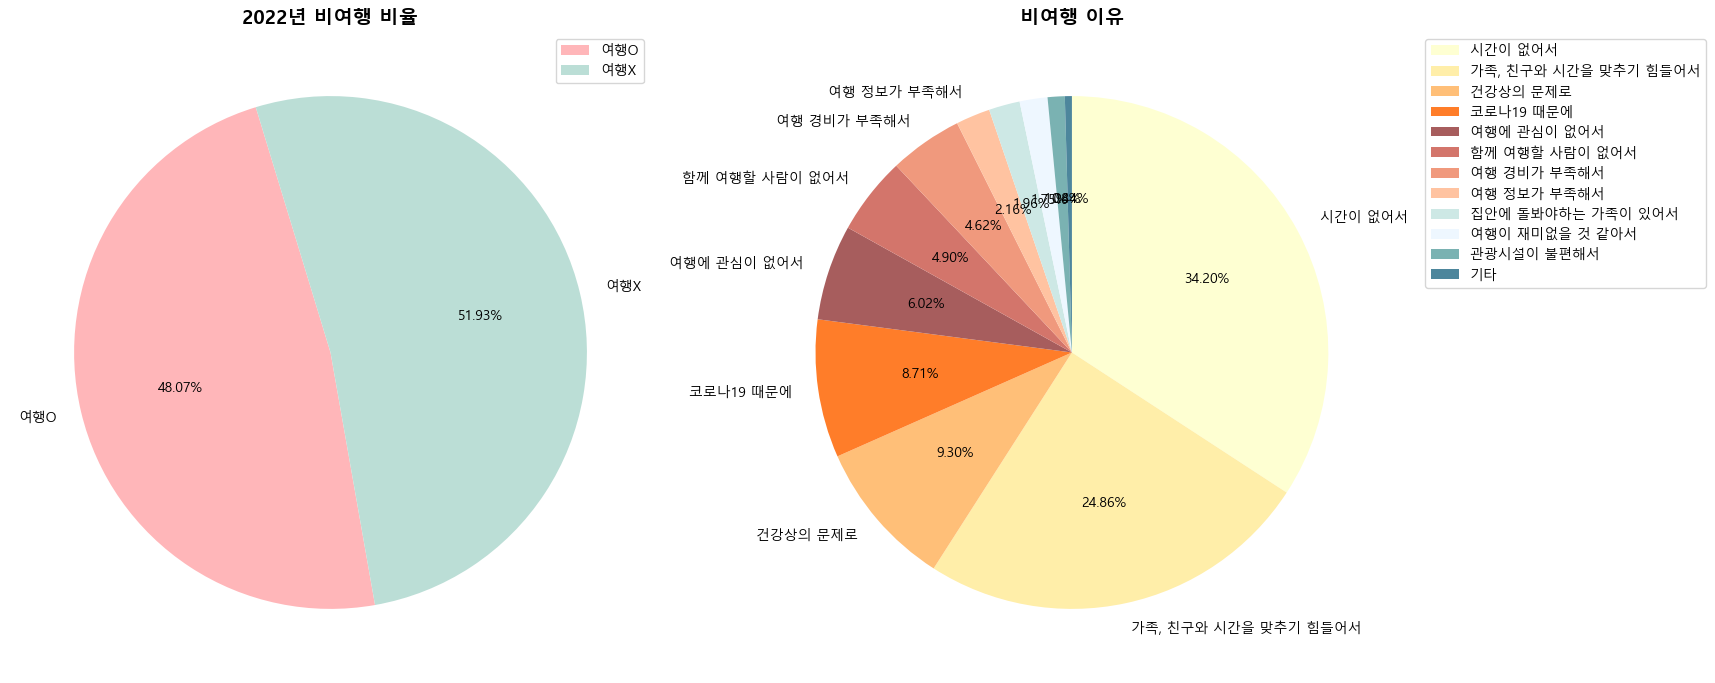

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 여행비율
tra_dic={'여행O' : [data.D_TRA1_SMONTH.count()],'여행X' : data.D_TRA1_SMONTH.isna().sum()}
tra=pd.DataFrame(tra_dic).T
tra.columns=['비율']
tra

# 비여행 이유
ntra_r=data['B9_1']
ntra_r = pd.DataFrame(ntra_r)
ntra_r.rename(columns={'B9_1' : '비여행이유'}, inplace = True)
ntra_r.dropna(inplace=True)
ntra_r=ntra_r.astype('int')
ntra_r=ntra_r.astype('str')
ntra_r=ntra_r.astype('category')
ntra_r['비여행이유']=ntra_r['비여행이유'].cat.rename_categories({'1':'여행에 관심이 없어서','2':'여행이 재미없을 것 같아서',
                                                       '3':'건강상의 문제로','4':'시간이 없어서','5':'여행 경비가 부족해서','6':'여행 정보가 부족해서',
                                                       '7':'관광시설이 불편해서','8':'함께 여행할 사람이 없어서','9':'가족, 친구와 시간을 맞추기 힘들어서',
                                                       '10':'집안에 돌봐야하는 가족이 있어서','11':'기타','21':'코로나19 때문에' })
ntra=pd.DataFrame(ntra_r.value_counts())
ntra=ntra.reset_index()
ntra


plt.figure(figsize=(17,8))

plt.subplot(1,2,1)
plt.title('2022년 비여행 비율',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
color=['#FFB6B9','#BBDED6']
plt.pie(tra['비율'],labels=tra.index,startangle=280,autopct='%1.2f%%',colors=color,counterclock=False)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('비여행 이유',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
blank=["" for x in range(4)]
label=ntra['비여행이유'].to_list()[:8]
label.extend(blank)
label
color=['#FEFFD2', '#FFEEA9', '#FFBF78', '#FF7D29', '#A75D5D', '#D3756B', '#F0997D', '#FFC3A1', '#CDE8E5', '#EEF7FF', '#7AB2B2', '#4D869C']
plt.pie(ntra['count'],labels=label,startangle=90,autopct='%1.2f%%',colors=color,counterclock=False)
plt.legend(ntra['비여행이유'], bbox_to_anchor=(1, 0, 0.5, 1))


plt.tight_layout()
plt.show()

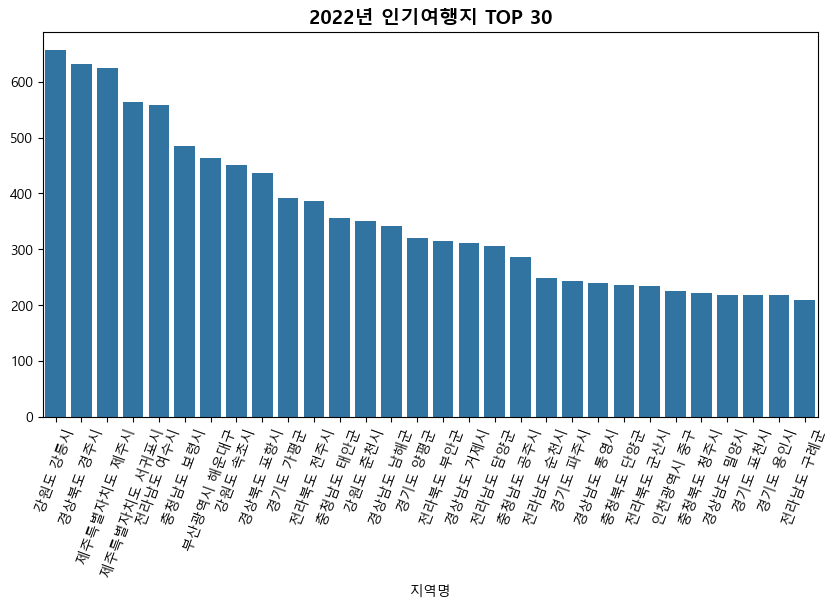

In [26]:
#2022년 인기여행지 TOP 30
tra_top_loc30=tra_df['지역명'].value_counts().head(30)

plt.figure(figsize=(10,5))
plt.xticks(rotation=70)
plt.title('2022년 인기여행지 TOP 30',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
sns.barplot(x=tra_top_loc30.index,y=tra_top_loc30.values)
plt.show()

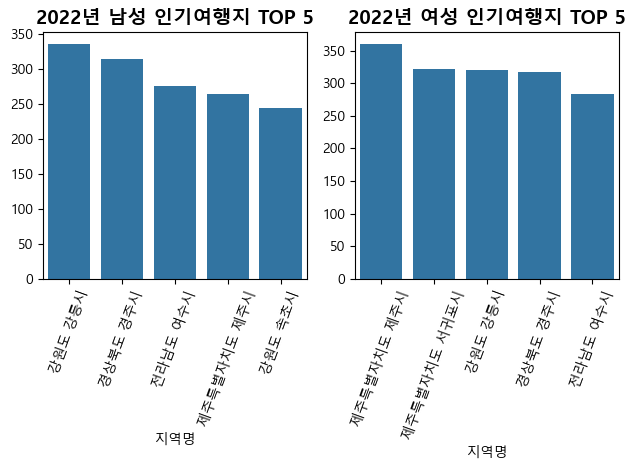

In [9]:
# 남녀별 인기 여행지 top5
tra_fm=tra_df[tra_df.성별=='여성']['지역명'].value_counts().head(5)
tra_m=tra_df[tra_df.성별=='남성']['지역명'].value_counts().head(5)

plt.subplot(1,2,1)
sns.barplot(x=tra_m.index,y=tra_m.values)
plt.xticks(rotation=70)
plt.title('2022년 남성 인기여행지 TOP 5',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})

plt.subplot(1,2,2)
sns.barplot(x=tra_fm.index,y=tra_fm.values)
plt.xticks(rotation=70)
plt.title('2022년 여성 인기여행지 TOP 5',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})

plt.tight_layout()
plt.show()

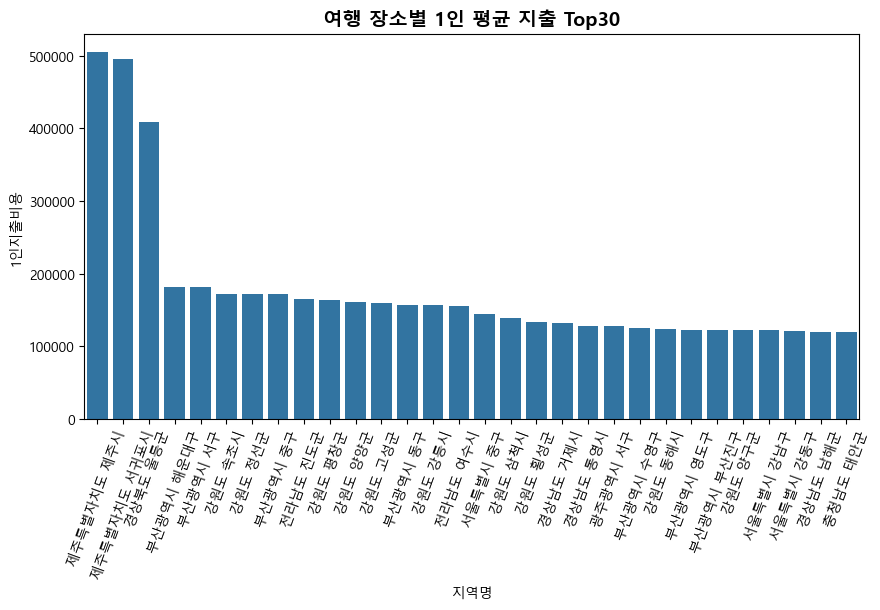

In [10]:
# 여행 장소별 1인 평균 지출 Top30
tra_cost=pd.DataFrame(tra_df['1인지출비용'].groupby(tra_df['지역명']).mean()).reset_index()
tra_cost=tra_cost.nlargest(n=30,columns='1인지출비용')

plt.figure(figsize=(10,5))
plt.xticks(rotation=70)
plt.title('여행 장소별 1인 평균 지출 Top30',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
sns.barplot(x=tra_cost['지역명'],y=tra_cost['1인지출비용'])
plt.show()

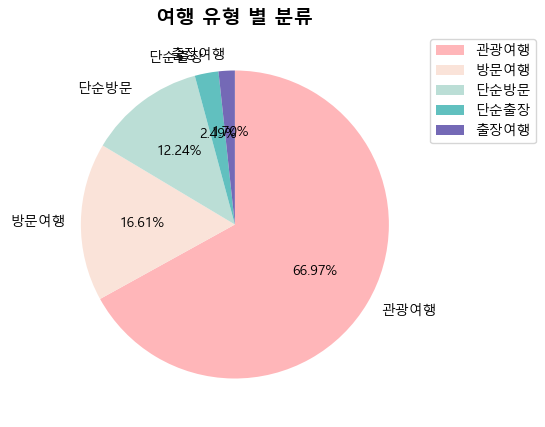

In [11]:
# 여행 유형 별 분류
tra_cat=tra_df['여행유형'].value_counts()
tra_cat=pd.DataFrame(tra_cat)
tra_cat

color= ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', '#7469B6']
plt.figure(figsize=(10,5))
plt.title('여행 유형 별 분류',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
plt.pie(tra_cat['count'],labels=tra_cat.index,startangle=90,colors=color,autopct='%1.2f%%',counterclock=False)
plt.legend(bbox_to_anchor=(1, 0, 0.3, 1))

# plt.figure(figsize=(10,5))
# plt.xticks(rotation=0) 
# plt.title('여행 유형 별 분류',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
# sns.barplot(x=tra_cat.index,y=tra_cat.values)
# plt.show()

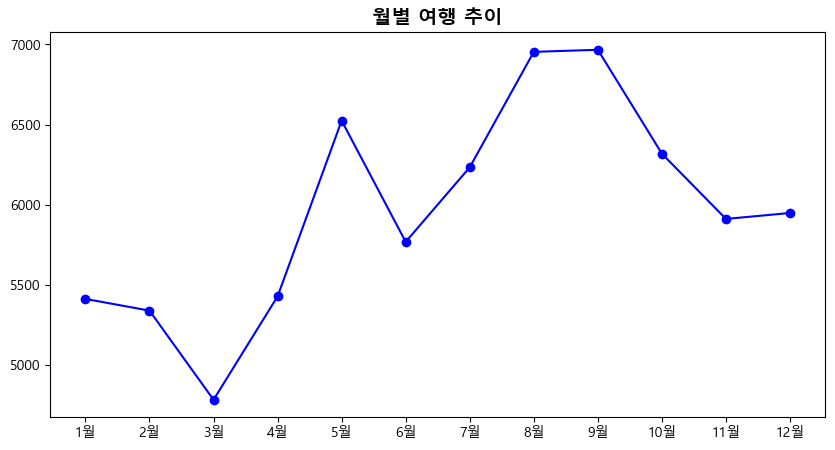

In [12]:
# 월별 여행 추이
tra_mon=tra_df['여행인원'].groupby(tra_df['시작날짜_월']).sum()
tra_mon.sort_index(inplace=True)
plt.figure(figsize=(10,5))
plt.xticks(np.arange(1,13,1),[ str(x)+'월' for x in range(1, 13)])
plt.title('월별 여행 추이',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
plt.plot(tra_mon.index,tra_mon.values,'bo-')
plt.show()


<Figure size 1000x500 with 0 Axes>

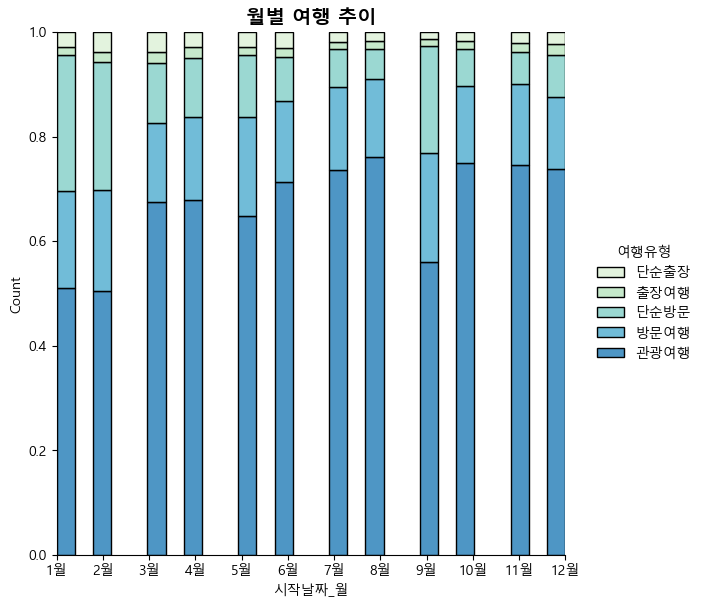

In [13]:
# 월별 여행 추이
# tra_mon=tra_df['시작날짜_월'].value_counts()
# tra_mon.sort_index(inplace=True)
# plt.figure(figsize=(10,5))
# plt.xticks(np.arange(1,13,1),[ str(x)+'월' for x in range(1, 13)])
# plt.title('월별 여행 추이',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
# plt.plot(tra_mon.index,tra_mon.values,'bo-')
# plt.show()
plt.figure(figsize=(10,5))
sns.displot(x='시작날짜_월',hue='여행유형',hue_order=['단순출장','출장여행','단순방문','방문여행','관광여행'],data=tra_df,kind='hist',height=6,multiple='fill',palette='GnBu')
plt.xticks(np.arange(1,13,1),[ str(x)+'월' for x in range(1, 13)])
plt.title('월별 여행 추이',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
plt.show()

In [14]:
# 날짜+지역 히트맵
loc_top_10=tra_df.groupby('지역명')['지역코드'].agg('count').sort_values(ascending=False)[:10]
loc_top_10=loc_top_10.index.to_list()
loc_top_10
tra_d=tra_df[tra_df['지역명'].isin(loc_top_10)]
tra_d
df_loc_mon=tra_d.groupby('시작날짜_월')['지역명'].value_counts().unstack().fillna(0).T
df_loc_mon

시작날짜_월,1,2,3,4,5,6,7,8,9,10,11,12
지역명,,,,,,,,,,,,
강원도 강릉시,58,42,32,44,48,53,62,79,55,56,44,83
강원도 속초시,29,34,28,26,28,44,40,53,39,51,38,40
경기도 가평군,21,26,23,34,29,38,59,44,28,37,30,22
경상북도 경주시,52,45,47,50,59,52,57,54,49,61,51,55
경상북도 포항시,37,31,30,35,45,31,44,37,42,27,36,41
부산광역시 해운대구,25,26,31,27,39,40,64,62,39,37,29,44
전라남도 여수시,45,34,31,44,44,54,47,52,48,55,42,63
제주특별자치도 서귀포시,29,29,40,50,64,52,51,54,44,53,47,51
제주특별자치도 제주시,48,45,47,51,58,56,59,60,52,53,51,45


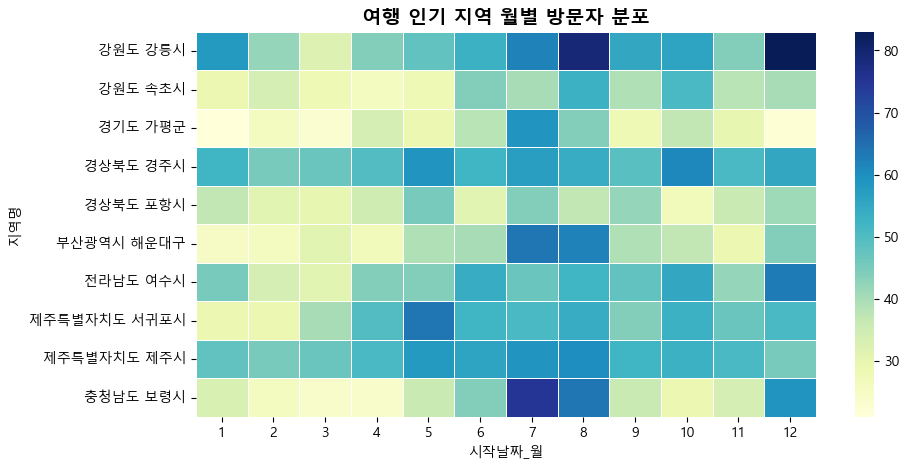

In [15]:
plt.figure(figsize=(10,5))
h=sns.heatmap(df_loc_mon,linewidth=.5,cmap='YlGnBu')
plt.title('여행 인기 지역 월별 방문자 분포',fontdict={'size':14 , 'family':'Malgun Gothic','weight':'bold'})
plt.show()

In [27]:
font_path='C:/Windows/Fonts/gulim.ttc'
loc_dict=tra_df.groupby('지역명')['지역코드'].agg('count')
loc_dict=loc_dict.to_dict()
loc_dict

{'강원도 강릉시': 656,
 '강원도 고성군': 81,
 '강원도 동해시': 123,
 '강원도 삼척시': 151,
 '강원도 속초시': 450,
 '강원도 양구군': 11,
 '강원도 양양군': 150,
 '강원도 영월군': 76,
 '강원도 원주시': 198,
 '강원도 인제군': 63,
 '강원도 정선군': 61,
 '강원도 철원군': 49,
 '강원도 춘천시': 350,
 '강원도 태백시': 42,
 '강원도 평창군': 126,
 '강원도 홍천군': 134,
 '강원도 화천군': 16,
 '강원도 횡성군': 36,
 '경기도 가평군': 391,
 '경기도 고양시': 114,
 '경기도 과천시': 80,
 '경기도 광명시': 29,
 '경기도 광주시': 128,
 '경기도 구리시': 34,
 '경기도 군포시': 37,
 '경기도 김포시': 109,
 '경기도 남양주시': 171,
 '경기도 동두천시': 31,
 '경기도 부천시': 47,
 '경기도 성남시': 104,
 '경기도 수원시': 175,
 '경기도 시흥시': 101,
 '경기도 안산시': 133,
 '경기도 안성시': 65,
 '경기도 안양시': 49,
 '경기도 양주시': 77,
 '경기도 양평군': 321,
 '경기도 여주시': 93,
 '경기도 연천군': 60,
 '경기도 오산시': 37,
 '경기도 용인시': 219,
 '경기도 의왕시': 47,
 '경기도 의정부시': 78,
 '경기도 이천시': 62,
 '경기도 파주시': 244,
 '경기도 평택시': 74,
 '경기도 포천시': 219,
 '경기도 하남시': 39,
 '경기도 화성시': 175,
 '경상남도 거제시': 311,
 '경상남도 거창군': 77,
 '경상남도 고성군': 57,
 '경상남도 김해시': 95,
 '경상남도 남해군': 341,
 '경상남도 밀양시': 219,
 '경상남도 사천시': 71,
 '경상남도 산청군': 90,
 '경상남도 양산시': 182,
 '경상남도 의령군': 26,
 '경상남도 진주시': 161

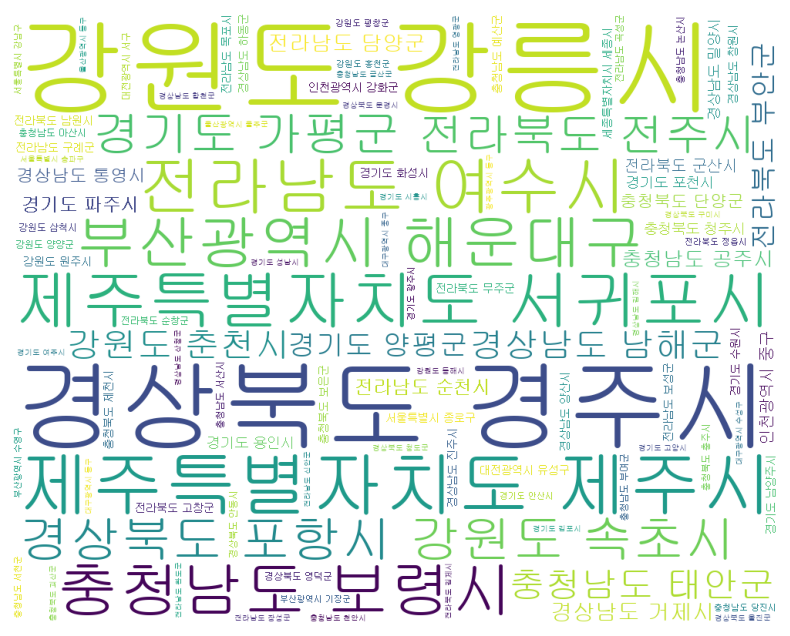

In [18]:
font_path='C:/Windows/Fonts/gulim.ttc'
loc_dict=tra_df.groupby('지역명')['지역코드'].agg('count')
loc_dict=loc_dict.to_dict()
loc_dict
plt.figure(figsize=(10,8))
wordcloud=WordCloud(background_color='white',width=1000,height=800,max_words=100,margin=10, random_state=3,font_path = font_path).fit_words(loc_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()